In [ ]:
import pandas as pd
from IPython.display import display  # عشان يعرض جدول بشكل مرتب في Jupyter [web:432]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image


In [2]:
# ==== Paths ====
csv_path = r"C:\Users\Thwaib-PC\Desktop\All_Projects\archive\.ipynb_checkpoints\All_Datasets_Reorganized-checkpoint.csv"


# ==== Load ====
df = pd.read_csv(csv_path, encoding="utf-8-sig")  

# ==== Drop columns ====
cols_to_drop = ["Time", "Date_2","Date"]  # غيّر القائمة حسب الأعمدة اللي بدك تحذفها
df = df.drop(columns=cols_to_drop, errors="ignore")  # errors=ignore ما يعمل خطأ إذا العمود مش موجود [web:340]

# ==== Show results in notebook ====
display(df.head(20))  # عرض أول 20 صف [web:360]
print("Shape (rows, cols):", df.shape)
if "Spam_Ham" in df.columns:
    print(df["Spam_Ham"].value_counts(dropna=False))  # إحصاء labels



,URL,Content,Author,Tweet_Text,Spam_Ham
0,https://twitter.com/AlArabiya/status/136664148...,NaN,NaN,سي إن إن تستعد إدارة الرئيس بايدن لفرض عقوبات ...,NaN
1,https://twitter.com/skynewsarabia/status/13639...,NaN,NaN,حكم يتصدى لكرة في طريقها لمرمى في لقطة كوميدية...,NaN
2,https://twitter.com/AlArabiya/status/136497388...,NaN,NaN,تابعونا على العربية عبر برنامج بانوراما ال بتو...,NaN
3,https://twitter.com/AlArabiya/status/136074035...,NaN,NaN,خبير بفريق التحقيق في منظمة الصحة العالمية بكي...,NaN
4,https://twitter.com/AlArabiya/status/136636818...,NaN,NaN,بالوثائق تعرف على أهم الاتفاقيات التاريخية لتر...,NaN
5,https://twitter.com/AlArabiya/status/136563882...,NaN,NaN,الإمارات تعلن وقوفها التام مع السعودية في جهود...,NaN
6,https://twitter.com/skynewsarabia/status/13641...,NaN,NaN,شحنة جديدة من لقاح كورونا الصيني تصل مطار القاهرة,NaN
7,NaN,NaN,NaN,الان متاح لدينا شهاده ايلتس معتمده بدون اختبار...,NaN
8,https://twitter.com/emaratalyoum/status/135908...,NaN,NaN,حبس موظف تحرش بطفل في الألعاب المائية الإمارات...,NaN
9,https://twitter.com/skynewsarabia/status/13638...,NaN,NaN,امتلاك هاتف محمول بين عقلية الماضي والحاضر,NaN


Shape (rows, cols): (2241, 5)
Spam_Ham
spam    830
ham     776
NaN     635
Name: count, dtype: int64


In [3]:
# Create author labels: spam / not_spam
tmp = df[df["Author"].notna() & df["Spam_Ham"].isin(["spam", "ham"])].copy()
tmp["is_spam"] = (tmp["Spam_Ham"] == "spam").astype(int)

authors = tmp.groupby("Author")["is_spam"].mean().reset_index()
authors["author_label"] = authors["is_spam"].ge(0.5).map({True: "spam", False: "not_spam"})

# Save to Excel file
authors[["Author", "author_label"]].to_excel("authors_labels.xlsx", index=False, engine="openpyxl")


In [4]:
df = df.drop(columns=["Author"], errors="ignore")  # drop column if exists [web:340][web:381]


In [5]:
display(df.head(20))               # عرض أول 20 صف [web:516]


,URL,Content,Tweet_Text,Spam_Ham
0,https://twitter.com/AlArabiya/status/136664148...,NaN,سي إن إن تستعد إدارة الرئيس بايدن لفرض عقوبات ...,NaN
1,https://twitter.com/skynewsarabia/status/13639...,NaN,حكم يتصدى لكرة في طريقها لمرمى في لقطة كوميدية...,NaN
2,https://twitter.com/AlArabiya/status/136497388...,NaN,تابعونا على العربية عبر برنامج بانوراما ال بتو...,NaN
3,https://twitter.com/AlArabiya/status/136074035...,NaN,خبير بفريق التحقيق في منظمة الصحة العالمية بكي...,NaN
4,https://twitter.com/AlArabiya/status/136636818...,NaN,بالوثائق تعرف على أهم الاتفاقيات التاريخية لتر...,NaN
5,https://twitter.com/AlArabiya/status/136563882...,NaN,الإمارات تعلن وقوفها التام مع السعودية في جهود...,NaN
6,https://twitter.com/skynewsarabia/status/13641...,NaN,شحنة جديدة من لقاح كورونا الصيني تصل مطار القاهرة,NaN
7,NaN,NaN,الان متاح لدينا شهاده ايلتس معتمده بدون اختبار...,NaN
8,https://twitter.com/emaratalyoum/status/135908...,NaN,حبس موظف تحرش بطفل في الألعاب المائية الإمارات...,NaN
9,https://twitter.com/skynewsarabia/status/13638...,NaN,امتلاك هاتف محمول بين عقلية الماضي والحاضر,NaN


In [6]:
# rows without spam/ham label
testing_df = df[df["Spam_Ham"].isna()].copy()  # select missing labels [web:537]

# save to Excel
testing_df.to_excel("Testing Model.xlsx", index=False, engine="openpyxl")  # export to Excel [web:536]


In [7]:
import numpy as np

u = df["URL"].astype(str).str.lower()

df["URL_Source"] = np.select(
    [
        u.str.contains("twitter.com", na=False) | u.str.contains("x.com", na=False),
        u.str.contains("youtube.com", na=False) | u.str.contains("youtu.be", na=False),
    ],
    ["twitter", "youtube"],
    default="other",
)


In [8]:
import pandas as pd

# Content: اعتبر الفارغ/المسافات كأنه مفقود
df["Content"] = df["Content"].replace(r"^\s*$", pd.NA, regex=True)

# عبّي Content من Tweet_Text فقط إذا Content مفقود
df["Content"] = df["Content"].fillna(df["Tweet_Text"])

display(df.head(20))               # عرض أول 20 صف [web:516]


,URL,Content,Tweet_Text,Spam_Ham,URL_Source
0,https://twitter.com/AlArabiya/status/136664148...,سي إن إن تستعد إدارة الرئيس بايدن لفرض عقوبات ...,سي إن إن تستعد إدارة الرئيس بايدن لفرض عقوبات ...,NaN,twitter
1,https://twitter.com/skynewsarabia/status/13639...,حكم يتصدى لكرة في طريقها لمرمى في لقطة كوميدية...,حكم يتصدى لكرة في طريقها لمرمى في لقطة كوميدية...,NaN,twitter
2,https://twitter.com/AlArabiya/status/136497388...,تابعونا على العربية عبر برنامج بانوراما ال بتو...,تابعونا على العربية عبر برنامج بانوراما ال بتو...,NaN,twitter
3,https://twitter.com/AlArabiya/status/136074035...,خبير بفريق التحقيق في منظمة الصحة العالمية بكي...,خبير بفريق التحقيق في منظمة الصحة العالمية بكي...,NaN,twitter
4,https://twitter.com/AlArabiya/status/136636818...,بالوثائق تعرف على أهم الاتفاقيات التاريخية لتر...,بالوثائق تعرف على أهم الاتفاقيات التاريخية لتر...,NaN,twitter
5,https://twitter.com/AlArabiya/status/136563882...,الإمارات تعلن وقوفها التام مع السعودية في جهود...,الإمارات تعلن وقوفها التام مع السعودية في جهود...,NaN,twitter
6,https://twitter.com/skynewsarabia/status/13641...,شحنة جديدة من لقاح كورونا الصيني تصل مطار القاهرة,شحنة جديدة من لقاح كورونا الصيني تصل مطار القاهرة,NaN,twitter
7,NaN,الان متاح لدينا شهاده ايلتس معتمده بدون اختبار...,الان متاح لدينا شهاده ايلتس معتمده بدون اختبار...,NaN,other
8,https://twitter.com/emaratalyoum/status/135908...,حبس موظف تحرش بطفل في الألعاب المائية الإمارات...,حبس موظف تحرش بطفل في الألعاب المائية الإمارات...,NaN,twitter
9,https://twitter.com/skynewsarabia/status/13638...,امتلاك هاتف محمول بين عقلية الماضي والحاضر,امتلاك هاتف محمول بين عقلية الماضي والحاضر,NaN,twitter


In [9]:
cols_to_drop = ["URL"]  # غيّر القائمة حسب الأعمدة اللي بدك تحذفها
df = df.drop(columns=cols_to_drop, errors="ignore")  # errors=ignore ما يعمل خطأ إذا العمود مش موجود [web:340]

In [10]:
df = df.drop(columns=["URL","Tweet_Text"], errors="ignore")  # drop column if exists [web:340][web:381]

In [11]:
display(df.head(20))               # عرض أول 20 صف [web:516]


,Content,Spam_Ham,URL_Source
0,سي إن إن تستعد إدارة الرئيس بايدن لفرض عقوبات ...,NaN,twitter
1,حكم يتصدى لكرة في طريقها لمرمى في لقطة كوميدية...,NaN,twitter
2,تابعونا على العربية عبر برنامج بانوراما ال بتو...,NaN,twitter
3,خبير بفريق التحقيق في منظمة الصحة العالمية بكي...,NaN,twitter
4,بالوثائق تعرف على أهم الاتفاقيات التاريخية لتر...,NaN,twitter
5,الإمارات تعلن وقوفها التام مع السعودية في جهود...,NaN,twitter
6,شحنة جديدة من لقاح كورونا الصيني تصل مطار القاهرة,NaN,twitter
7,الان متاح لدينا شهاده ايلتس معتمده بدون اختبار...,NaN,other
8,حبس موظف تحرش بطفل في الألعاب المائية الإمارات...,NaN,twitter
9,امتلاك هاتف محمول بين عقلية الماضي والحاضر,NaN,twitter


In [12]:
# df هو DataFrame تبعك
df.to_excel("dataset_clean.xlsx", index=False)


In [13]:
from sklearn.model_selection import train_test_split

# استخدم فقط الصفوف اللي عليها ليبل
labeled_df = df[df["Spam_Ham"].notna()].copy()
labeled_df["Spam_Ham"] = labeled_df["Spam_Ham"].astype(str).str.strip().str.lower()
labeled_df = labeled_df[labeled_df["Spam_Ham"].isin(["spam", "ham"])].copy()

# Split: 15% Test (stratified)
train_val_df, test_df = train_test_split(
    labeled_df,
    test_size=0.15,
    random_state=42,
    stratify=labeled_df["Spam_Ham"]
)

# Val = 15% من الإجمالي => 15/85 من train_val
val_size_from_train_val = 0.15 / 0.85

train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_size_from_train_val,
    random_state=42,
    stratify=train_val_df["Spam_Ham"]
)

X_train, y_train = train_df["Content"], train_df["Spam_Ham"]
X_val, y_val     = val_df["Content"],   val_df["Spam_Ham"]
X_test, y_test   = test_df["Content"],  test_df["Spam_Ham"]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF: word ngrams (1,2)
word_vec = TfidfVectorizer(analyzer="word", ngram_range=(1,2), min_df=2, max_df=0.95)

# TF-IDF: char ngrams (3,5)
char_vec = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2, max_df=0.95)

features = FeatureUnion([
    ("word", word_vec),
    ("char", char_vec),
])

baseline_lr = Pipeline([
    ("features", features),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

baseline_lr.fit(X_train, y_train)

# توقعات
val_pred  = baseline_lr.predict(X_val)
test_pred = baseline_lr.predict(X_test)

print("=== Validation report ===")
print(classification_report(y_val, val_pred, digits=4))

print("=== Test report ===")
print(classification_report(y_test, test_pred, digits=4))

# Confusion matrices 
labels = ["ham", "spam"] 
cm_val  = confusion_matrix(y_val,  val_pred,  labels=labels)
cm_test = confusion_matrix(y_test, test_pred, labels=labels)

print("Validation CM:\n", cm_val)
print("Test CM:\n", cm_test)


=== Validation report ===
              precision    recall  f1-score   support

         ham     0.9508    0.9915    0.9707       117
        spam     0.9916    0.9516    0.9712       124

    accuracy                         0.9710       241
   macro avg     0.9712    0.9715    0.9710       241
weighted avg     0.9718    0.9710    0.9710       241

=== Test report ===
              precision    recall  f1-score   support

         ham     0.9187    0.9741    0.9456       116
        spam     0.9746    0.9200    0.9465       125

    accuracy                         0.9461       241
   macro avg     0.9466    0.9471    0.9461       241
weighted avg     0.9477    0.9461    0.9461       241

Validation CM:
 [[116   1]
 [  6 118]]
Test CM:
 [[113   3]
 [ 10 115]]


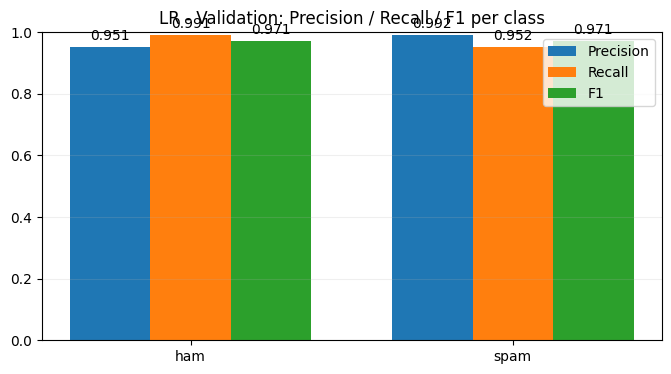

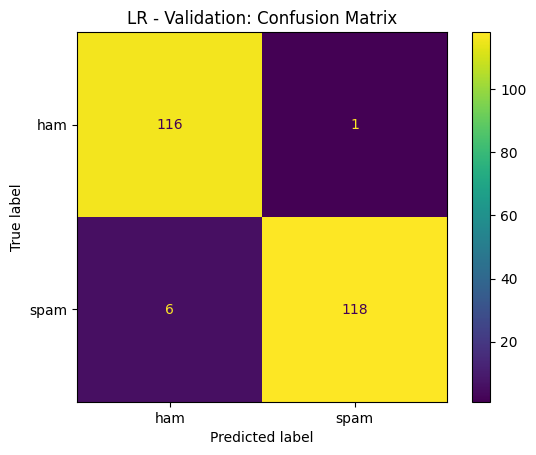

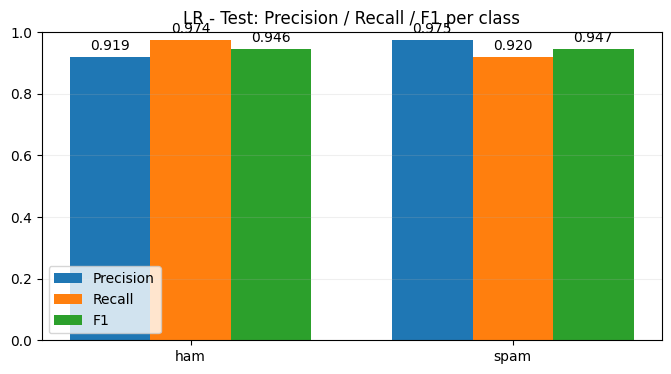

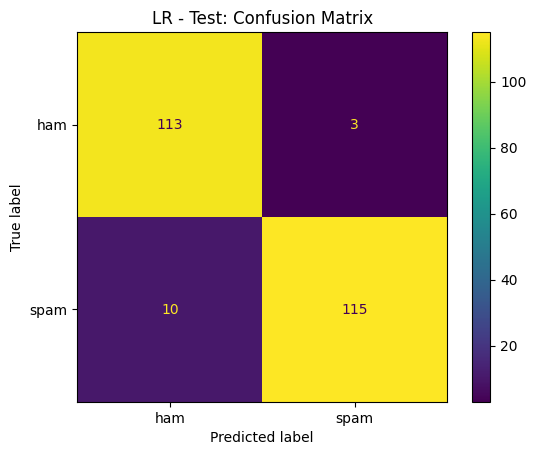

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

def plot_metrics_and_cm(y_true, y_pred, labels=("ham","spam"), title_prefix="Validation",
                        show_values=True, value_fmt="{:.3f}", value_fontsize=10):
    # per-class metrics
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=list(labels), zero_division=0
    )

    x = np.arange(len(labels))
    width = 0.25

    plt.figure(figsize=(8,4))

    b1 = plt.bar(x - width, p,  width, label="Precision")
    b2 = plt.bar(x,         r,  width, label="Recall")
    b3 = plt.bar(x + width, f1, width, label="F1")

    plt.xticks(x, labels)
    plt.ylim(0, 1)
    plt.title(f"{title_prefix}: Precision / Recall / F1 per class")
    plt.legend()
    plt.grid(axis="y", alpha=0.2)

    # --- ADD NUMBERS ON TOP OF BARS ---
    if show_values:
        ax = plt.gca()
        ax.bar_label(b1, labels=[value_fmt.format(v) for v in p], padding=3, fontsize=value_fontsize)
        ax.bar_label(b2, labels=[value_fmt.format(v) for v in r], padding=3, fontsize=value_fontsize)
        ax.bar_label(b3, labels=[value_fmt.format(v) for v in f1], padding=3, fontsize=value_fontsize)

    plt.show()

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(labels))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(labels))
    disp.plot(values_format="d")
    plt.title(f"{title_prefix}: Confusion Matrix")
    plt.show()

# رسومات للـ Logistic Regression
plot_metrics_and_cm(y_val,  val_pred,  labels=("ham","spam"), title_prefix="LR - Validation")
plot_metrics_and_cm(y_test, test_pred, labels=("ham","spam"), title_prefix="LR - Test")


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# نفس الـ TF-IDF اللي استخدمته مع الـ Logistic Regression
word_vec = TfidfVectorizer(analyzer="word", ngram_range=(1,2), min_df=2, max_df=0.95)
char_vec = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2, max_df=0.95)

features = FeatureUnion([
    ("word", word_vec),
    ("char", char_vec),
])

svc_model = Pipeline([
    ("features", features),
    ("clf", LinearSVC(class_weight="balanced"))
])

svc_model.fit(X_train, y_train)

svc_val_pred  = svc_model.predict(X_val)
svc_test_pred = svc_model.predict(X_test)

print("=== LinearSVC Validation report ===")
print(classification_report(y_val, svc_val_pred, digits=4))

print("=== LinearSVC Test report ===")
print(classification_report(y_test, svc_test_pred, digits=4))

labels = ["ham", "spam"]  # عدّلها لو تسمياتك مختلفة
print("Validation CM:\n", confusion_matrix(y_val, svc_val_pred, labels=labels))
print("Test CM:\n", confusion_matrix(y_test, svc_test_pred, labels=labels))


=== LinearSVC Validation report ===
              precision    recall  f1-score   support

         ham     0.9504    0.9829    0.9664       117
        spam     0.9833    0.9516    0.9672       124

    accuracy                         0.9668       241
   macro avg     0.9669    0.9673    0.9668       241
weighted avg     0.9674    0.9668    0.9668       241

=== LinearSVC Test report ===
              precision    recall  f1-score   support

         ham     0.9431    1.0000    0.9707       116
        spam     1.0000    0.9440    0.9712       125

    accuracy                         0.9710       241
   macro avg     0.9715    0.9720    0.9710       241
weighted avg     0.9726    0.9710    0.9710       241

Validation CM:
 [[115   2]
 [  6 118]]
Test CM:
 [[116   0]
 [  7 118]]


In [17]:
%pip install -q --upgrade transformers accelerate datasets ipywidgets tqdm scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split

labeled_df = df[df["Spam_Ham"].notna()].copy()
labeled_df["Spam_Ham"] = labeled_df["Spam_Ham"].astype(str).str.strip().str.lower()
labeled_df = labeled_df[labeled_df["Spam_Ham"].isin(["spam", "ham"])].copy()

train_val_df, test_df = train_test_split(
    labeled_df,
    test_size=0.15,
    random_state=42,
    stratify=labeled_df["Spam_Ham"]
)

val_size_from_train_val = 0.15 / 0.85
train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_size_from_train_val,
    random_state=42,
    stratify=train_val_df["Spam_Ham"]
)

print(len(train_df), len(val_df), len(test_df))


1124 241 241


In [19]:
import pandas as pd

train_dl = train_df[["Content", "Spam_Ham"]].rename(columns={"Spam_Ham": "label"}).copy()
val_dl   = val_df[["Content", "Spam_Ham"]].rename(columns={"Spam_Ham": "label"}).copy()
test_dl  = test_df[["Content", "Spam_Ham"]].rename(columns={"Spam_Ham": "label"}).copy()

label2id = {"ham": 0, "spam": 1}
id2label = {0: "ham", 1: "spam"}

for d in (train_dl, val_dl, test_dl):
    d["label"] = d["label"].astype(str).str.strip().str.lower().map(label2id)

train_dl = train_dl.dropna(subset=["label"]).reset_index(drop=True)
val_dl   = val_dl.dropna(subset=["label"]).reset_index(drop=True)
test_dl  = test_dl.dropna(subset=["label"]).reset_index(drop=True)

train_dl["label"] = train_dl["label"].astype(int)
val_dl["label"]   = val_dl["label"].astype(int)
test_dl["label"]  = test_dl["label"].astype(int)

train_dl.head()


,Content,label
0,Hi.Check out and share our songs.,1
1,Her voice sounds weird and plus she&#39;s cute...,0
2,Check out this video on YouTube:Qq﻿,1
3,http://www.twitch.tv/daconnormc﻿,1
4,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1


In [20]:
from datasets import Dataset
from transformers import AutoTokenizer

MODEL_NAME = "distilbert-base-uncased"
MAX_LEN = 128

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

train_ds = Dataset.from_pandas(train_dl, preserve_index=False)
val_ds   = Dataset.from_pandas(val_dl,   preserve_index=False)
test_ds  = Dataset.from_pandas(test_dl,  preserve_index=False)

def tokenize_fn(batch):
    return tokenizer(
        batch["Content"],
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN
    )

train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds   = val_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn, batched=True)

cols_to_keep = ["input_ids", "attention_mask", "label"]
train_ds = train_ds.remove_columns([c for c in train_ds.column_names if c not in cols_to_keep])
val_ds   = val_ds.remove_columns([c for c in val_ds.column_names if c not in cols_to_keep])
test_ds  = test_ds.remove_columns([c for c in test_ds.column_names if c not in cols_to_keep])

train_ds.set_format("torch")
val_ds.set_format("torch")
test_ds.set_format("torch")

print(train_ds)
print(train_ds[0])


Map:   0%|          | 0/1124 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1124
})
{'label': tensor(1), 'input_ids': tensor([ 101, 7632, 1012, 4638, 2041, 1998, 3745, 2256, 2774, 1012,  102,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]), 'attention_mask': te

In [21]:
from transformers import TrainingArguments

common_args = dict(
    output_dir="./distilbert_spam",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to="none",
    disable_tqdm=True
)

training_args = None
errors = []

# جرّب evaluation_strategy
try:
    training_args = TrainingArguments(**common_args, evaluation_strategy="epoch")
except TypeError as e:
    errors.append(("evaluation_strategy", str(e)))

# جرّب eval_strategy (بعض النسخ الجديدة)
if training_args is None:
    try:
        training_args = TrainingArguments(**common_args, eval_strategy="epoch")
    except TypeError as e:
        errors.append(("eval_strategy", str(e)))

# جرّب evaluate_during_training (نسخ قديمة جدًا)
if training_args is None:
    try:
        training_args = TrainingArguments(**common_args, evaluate_during_training=True)
    except TypeError as e:
        errors.append(("evaluate_during_training", str(e)))

if training_args is None:
    raise RuntimeError("ولا خيار اشتغل. الأخطاء:\n" + "\n".join([f"{k}: {msg}" for k, msg in errors]))

training_args


TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=True,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=True,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False,


In [22]:
!pip -q install -U transformers accelerate datasets scikit-learn


In [23]:
import numpy as np
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, f1_score


In [24]:
MODELNAME = "distilbert-base-uncased"
MAXLEN = 128


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1) اقرأ الداتا (استخدم نفس مسارك)
csv_path = r"C:\Users\Thwaib-PC\Desktop\All_Projects\archive\.ipynb_checkpoints\All_Datasets_Reorganized-checkpoint.csv"
df = pd.read_csv(csv_path, encoding="utf-8-sig")

# 2) وحّد اسم عمود الليبل (عشان ما تختلف)
if "Spam_Ham" in df.columns:
    df = df.rename(columns={"Spam_Ham": "SpamHam"})

# 3) جهّز Content (لو Content فاضي استخدم TweetText)
df["Content"] = df["Content"].replace(r"^\s*$", pd.NA, regex=True)
if "TweetText" in df.columns:
    df["Content"] = df["Content"].fillna(df["TweetText"])

# 4) Drop اللي مش لازم
df = df.drop(columns=["Time","Date_2","Date","Author","URL","TweetText"], errors="ignore")

# 5) labeled only
labeleddf = df[df["SpamHam"].notna()].copy()
labeleddf["SpamHam"] = labeleddf["SpamHam"].astype(str).str.strip().str.lower()
labeleddf = labeleddf[labeleddf["SpamHam"].isin(["spam","ham"])].copy()

# 6) split -> (هذا اللي كان ناقص عندك)
trainvaldf, testdf = train_test_split(
    labeleddf, test_size=0.15, random_state=42, stratify=labeleddf["SpamHam"]
)
val_size_from_trainval = 0.15 / 0.85
traindf, valdf = train_test_split(
    trainvaldf, test_size=val_size_from_trainval, random_state=42, stratify=trainvaldf["SpamHam"]
)

print("OK:", traindf.shape, valdf.shape, testdf.shape)


OK: (1124, 3) (241, 3) (241, 3)


In [26]:
# لازم تكون موجودة عندك من النوتبوك: traindf, valdf, testdf
# كل واحد فيهم فيه عمودين: Content و SpamHam (spam/ham)

label2id = {"ham": 0, "spam": 1}
id2label = {0: "ham", 1: "spam"}

for d in (traindf, valdf, testdf):
    d["SpamHam"] = d["SpamHam"].astype(str).str.strip().str.lower().map(label2id).astype(int)


In [27]:
tokenizer = AutoTokenizer.from_pretrained(MODELNAME)

traindl = traindf[["Content", "SpamHam"]].rename(columns={"SpamHam":"label"}).copy()
valdl   = valdf[["Content", "SpamHam"]].rename(columns={"SpamHam":"label"}).copy()
testdl  = testdf[["Content", "SpamHam"]].rename(columns={"SpamHam":"label"}).copy()

trainds = Dataset.from_pandas(traindl, preserve_index=False)
valds   = Dataset.from_pandas(valdl, preserve_index=False)
testds  = Dataset.from_pandas(testdl, preserve_index=False)

def tokenize_fn(batch):
    return tokenizer(batch["Content"], truncation=True, padding="max_length", max_length=MAXLEN)

trainds = trainds.map(tokenize_fn, batched=True)
valds   = valds.map(tokenize_fn, batched=True)
testds  = testds.map(tokenize_fn, batched=True)

cols_to_keep = ["input_ids", "attention_mask", "label"]
trainds = trainds.remove_columns([c for c in trainds.column_names if c not in cols_to_keep])
valds   = valds.remove_columns([c for c in valds.column_names if c not in cols_to_keep])
testds  = testds.remove_columns([c for c in testds.column_names if c not in cols_to_keep])

trainds.set_format("torch")
valds.set_format("torch")
testds.set_format("torch")


Map:   0%|          | 0/1124 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

In [28]:
model = AutoModelForSequenceClassification.from_pretrained(
    MODELNAME,
    num_labels=2,
    label2id=label2id,
    id2label=id2label
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="binary"),
    }


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
commonargs = dict(
    output_dir="distilbert-spam",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to="none",
    disable_tqdm=True,
)

trainingargs = None
try:
    trainingargs = TrainingArguments(**commonargs, evaluation_strategy="epoch")
except TypeError:
    try:
        trainingargs = TrainingArguments(**commonargs, eval_strategy="epoch")
    except TypeError:
        trainingargs = TrainingArguments(**commonargs)


In [30]:
import os

save_dir = r"C:\Users\Thwaib-PC\Desktop\All_Projects\archive" 

os.makedirs(save_dir, exist_ok=True)

trainer.save_model(save_dir)          
tokenizer.save_pretrained(save_dir)   # tokenizer files

print("Saved to:", save_dir)
print("Files:", os.listdir(save_dir))


NameError: name 'trainer' is not defined

In [ ]:
import os

save_dir = r"C:\Users\Thwaib-PC\Desktop\All_Projects\archive\artifacts\distilbert_final"
os.makedirs(save_dir, exist_ok=True)

trainer.save_model(save_dir)
tokenizer.save_pretrained(save_dir)

print("Saved to:", save_dir)
print("Files:", os.listdir(save_dir))
